In [22]:
try:
    import cPickle as pickle
except ImportError:  # Python 3.x
    import pickle
import os
import pandas as pd
import seaborn as sns
cur_path = 'summaries.p'


In [23]:
with open(cur_path, 'rb') as fp:
    data = pickle.load(fp)
for i in data.keys():
	if i=='condition':
		continue

	print(i,len(data[i]))
del data['condition']
df = pd.DataFrame.from_dict(data, orient='columns')
df

steps_1 348
steps_2 348
auc_1 348
auc_2 348
auc_forget 348
index 348
id 348
accuracy_1 348
accuracy_2 348
accuracy_forget 348
hidden_size 348


,steps_1,steps_2,auc_1,auc_2,auc_forget,index,id,accuracy_1,accuracy_2,accuracy_forget,hidden_size
0,19242,3203,0.999997,0.999998,0.466847,0,original,0.99935,0.99924,0.58277,10
1,20143,2458,1.000000,0.998359,0.422051,0,heterogeneous_constant,0.99972,0.99156,0.54247,10
2,19761,2924,0.999992,0.999888,0.455402,0,heterogeneous_dynamic_weights_relu6,0.99886,0.99633,0.57580,10
3,15002,10752,0.999946,0.999803,0.494005,0,original,0.99643,0.99391,0.55945,10
4,14928,11140,0.999980,0.999851,0.313795,0,heterogeneous_constant,0.99755,0.99405,0.50838,10
...,...,...,...,...,...,...,...,...,...,...,...
343,13550,15572,0.999999,0.999990,0.346942,1,heterogeneous_constant,0.99969,0.99845,0.51215,10
344,13804,14920,0.999981,0.999923,0.589954,1,heterogeneous_dynamic_weights_relu6,0.99846,0.99565,0.58855,10
345,15534,3931,0.999991,0.999800,0.519953,2,original,0.99911,0.99467,0.57851,10
346,13636,4460,0.999955,0.999870,0.441684,2,heterogeneous_constant,0.99835,0.99576,0.51693,10


<AxesSubplot: xlabel='id', ylabel='accuracy_forget'>

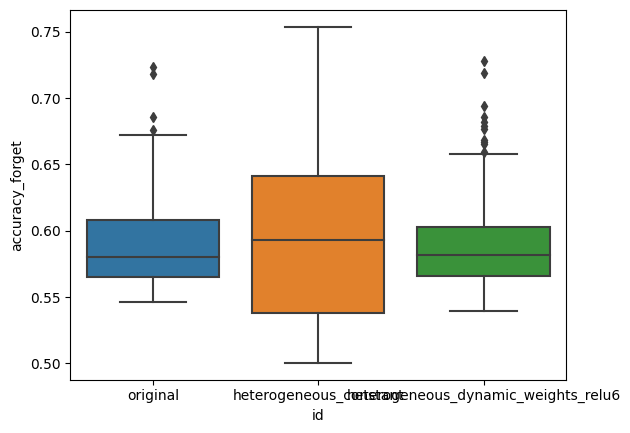

In [25]:
sns.boxplot(df,x='id',y='accuracy_forget')